In [1]:
import numpy as np #we simulate two multivariate normal 
import matplotlib.pyplot as plt
mean1 = np.array([0,0])
mean2 = np.array([3,3])
cov = np.array([[1,0.7],[0.7,1]])
x = np.vstack((np.random.multivariate_normal(mean1, cov, 50),np.random.multivariate_normal(mean2, cov, 50)))
y = np.array([0] * 50 + [1] *50)

In [2]:
def lda(x,y): # x is the feature matrix, y is the dependent vector
    predict = []
    count = np.bincount(y)
    classes, y1 = np.unique(y, return_inverse = True)
    mean = np.zeros((len(classes),x.shape[1]))
    np.add.at(mean,y1,x)
    mean /= count[:,None]
    cov = np.zeros((len(classes), len(classes)))
    for i in classes:
        covi = np.cov(x[y==i].T, bias = 1)
        cov += covi / (count[i] - 1)
    for i in x:
        predict.append(np.argmax([-np.array(i-mean[j]).T@np.linalg.inv(cov)@np.array(i-mean[j]) for j in range(len(classes))]))
    return np.array(predict)

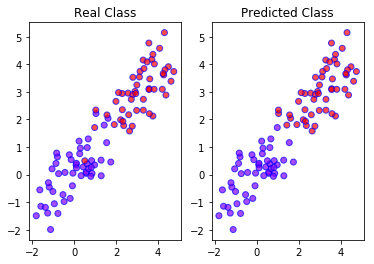

In [3]:
predict = lda(x,y)
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1], c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b')
plt.title('Real Class')
plt.subplot(1,2,2)
plt.scatter(x[:,0],x[:,1], c=predict,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b')
plt.title('Predicted Class')
pass

In [4]:
accuracy= 1 - sum(abs(predict - y)) / len(y)
print('accuracy is ' + str(round(accuracy,2)))

accuracy is 0.95
